# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [3]:
data = pd.read_csv("near_earth_asteroids.csv")
data.head()

,full_name,a,e,i,om,w,q,ad,per.y,data_arc,...,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha
0,433 Eros (A898 PA),1.458,0.2227,10.83,304.30,178.90,1.133,1.78,1.76,46582.0,...,0.250,5.270,0.000446,0.921,0.531,NaN,S,S,Y,N
1,719 Albert (A911 TB),2.638,0.5470,11.58,183.86,156.23,1.195,4.08,4.28,40008.0,...,NaN,5.801,NaN,NaN,NaN,NaN,S,NaN,Y,N
2,887 Alinda (A918 AA),2.473,0.5705,9.39,110.43,350.49,1.062,3.88,3.89,37799.0,...,0.310,28.410,NaN,0.832,0.436,NaN,NaN,S,Y,N
3,1036 Ganymed (A924 UB),2.666,0.5331,26.68,215.52,132.43,1.245,4.09,4.35,35448.0,...,0.238,10.297,NaN,0.842,0.417,NaN,S,S,Y,N
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.64,1.082,2.75,2.66,32747.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N


In [4]:
# eliminate columns with too many NA values
data = data.drop(columns=["n_del_obs_used", "n_dop_obs_used", "diameter", "extent", "albedo", "rot_per", "GM",
                          "BV", "UB", "IR", "spec_B", "spec_T", "neo"])
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [5]:
# change target column from Y or N to 1 or 0
data["pha"] = data["pha"].replace({"Y":1, "N":0}, regex=True)
data.head()

,full_name,a,e,i,om,w,q,ad,per.y,data_arc,condition_code,n_obs_used,H,epoch.mjd,ma,pha
0,433 Eros (A898 PA),1.458,0.2227,10.83,304.30,178.90,1.133,1.78,1.76,46582.0,0.0,9130,10.43,59600,246.90,0
1,719 Albert (A911 TB),2.638,0.5470,11.58,183.86,156.23,1.195,4.08,4.28,40008.0,0.0,1894,15.51,59600,278.20,0
2,887 Alinda (A918 AA),2.473,0.5705,9.39,110.43,350.49,1.062,3.88,3.89,37799.0,0.0,2624,13.87,59600,86.61,0
3,1036 Ganymed (A924 UB),2.666,0.5331,26.68,215.52,132.43,1.245,4.09,4.35,35448.0,0.0,7081,9.25,59600,140.65,0
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.64,1.082,2.75,2.66,32747.0,0.0,566,17.39,59600,261.04,0


In [6]:
# extract the year from the name
years = []
for i in range(len(data)):
    year = data["full_name"][i].split()[-2][1:]
    try:
        if int(year) < 2022:
            years.append(int(year))
        else:
            years.append(np.nan)
    except:
        if int(year[2:]) == 2019:
            years.append(2019)
        else:
            years.append(np.nan)

data["year"] = years
data.head()

,full_name,a,e,i,om,w,q,ad,per.y,data_arc,condition_code,n_obs_used,H,epoch.mjd,ma,pha,year
0,433 Eros (A898 PA),1.458,0.2227,10.83,304.30,178.90,1.133,1.78,1.76,46582.0,0.0,9130,10.43,59600,246.90,0,NaN
1,719 Albert (A911 TB),2.638,0.5470,11.58,183.86,156.23,1.195,4.08,4.28,40008.0,0.0,1894,15.51,59600,278.20,0,NaN
2,887 Alinda (A918 AA),2.473,0.5705,9.39,110.43,350.49,1.062,3.88,3.89,37799.0,0.0,2624,13.87,59600,86.61,0,NaN
3,1036 Ganymed (A924 UB),2.666,0.5331,26.68,215.52,132.43,1.245,4.09,4.35,35448.0,0.0,7081,9.25,59600,140.65,0,NaN
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.64,1.082,2.75,2.66,32747.0,0.0,566,17.39,59600,261.04,0,1932.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27240 entries, 0 to 27239
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       27240 non-null  object 
 1   a               27240 non-null  float64
 2   e               27240 non-null  float64
 3   i               27240 non-null  float64
 4   om              27240 non-null  float64
 5   w               27240 non-null  float64
 6   q               27240 non-null  float64
 7   ad              27240 non-null  float64
 8   per.y           27240 non-null  float64
 9   data_arc        27240 non-null  float64
 10  condition_code  27240 non-null  float64
 11  n_obs_used      27240 non-null  int64  
 12  H               27240 non-null  float64
 13  epoch.mjd       27240 non-null  int64  
 14  ma              27240 non-null  float64
 15  pha             27240 non-null  int64  
 16  year            27232 non-null  float64
dtypes: float64(13), int64(3), objec

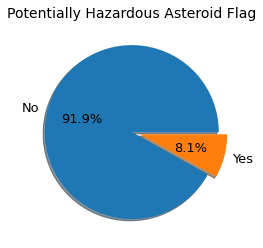

In [8]:
plt.pie(data["pha"].value_counts().values, labels=["No", "Yes"], autopct="%1.1f%%",
        explode=(0,0.1), shadow=True, textprops={"fontsize": 13})
plt.title("Potentially Hazardous Asteroid Flag", fontsize=14);

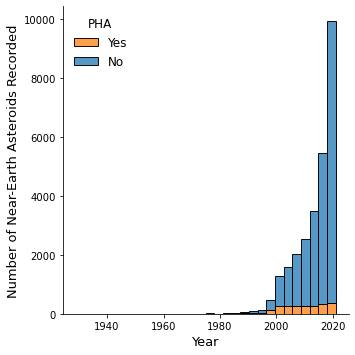

In [9]:
sns.displot(data=data, x="year", hue="pha", bins=30, multiple="stack", legend=False)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Near-Earth Asteroids Recorded", fontsize=13)
plt.legend(title="PHA", loc="upper left", frameon=False, labels=["Yes", "No"], fontsize=12, title_fontsize=12);

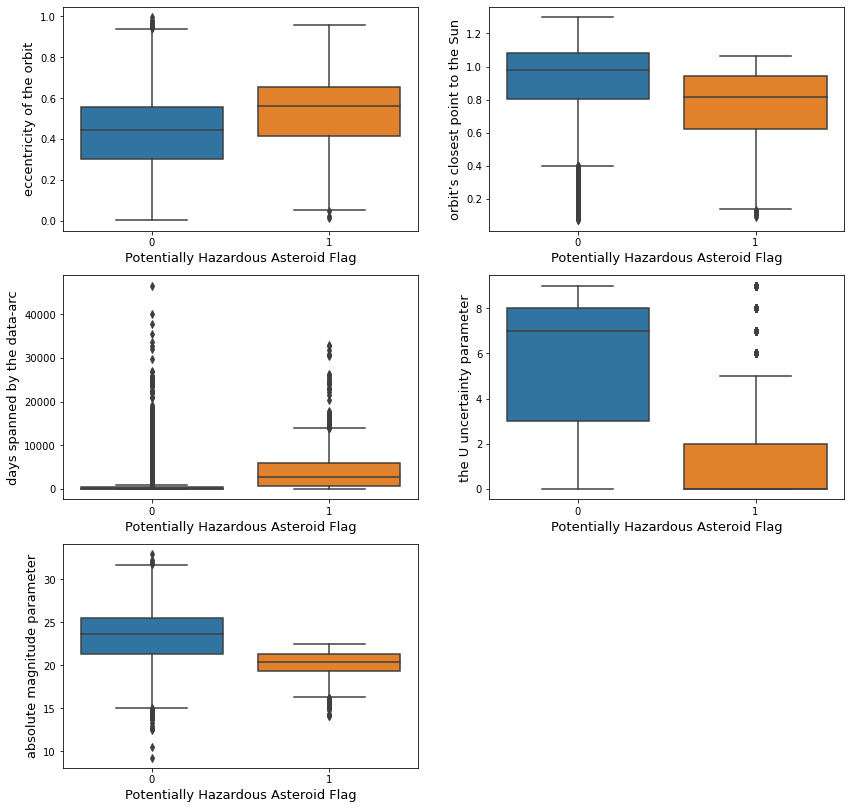

In [10]:
plt.figure(figsize=(14, 14))
ys = ["e", "q", "data_arc", "condition_code", "H"]
labels = ["eccentricity of the orbit", "orbit’s closest point to the Sun", "days spanned by the data-arc",
          "the U uncertainty parameter", "absolute magnitude parameter"]
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.boxplot(x="pha", y=ys[i], data=data)
    plt.xlabel("Potentially Hazardous Asteroid Flag", fontsize=13)
    plt.ylabel(labels[i], fontsize=13)

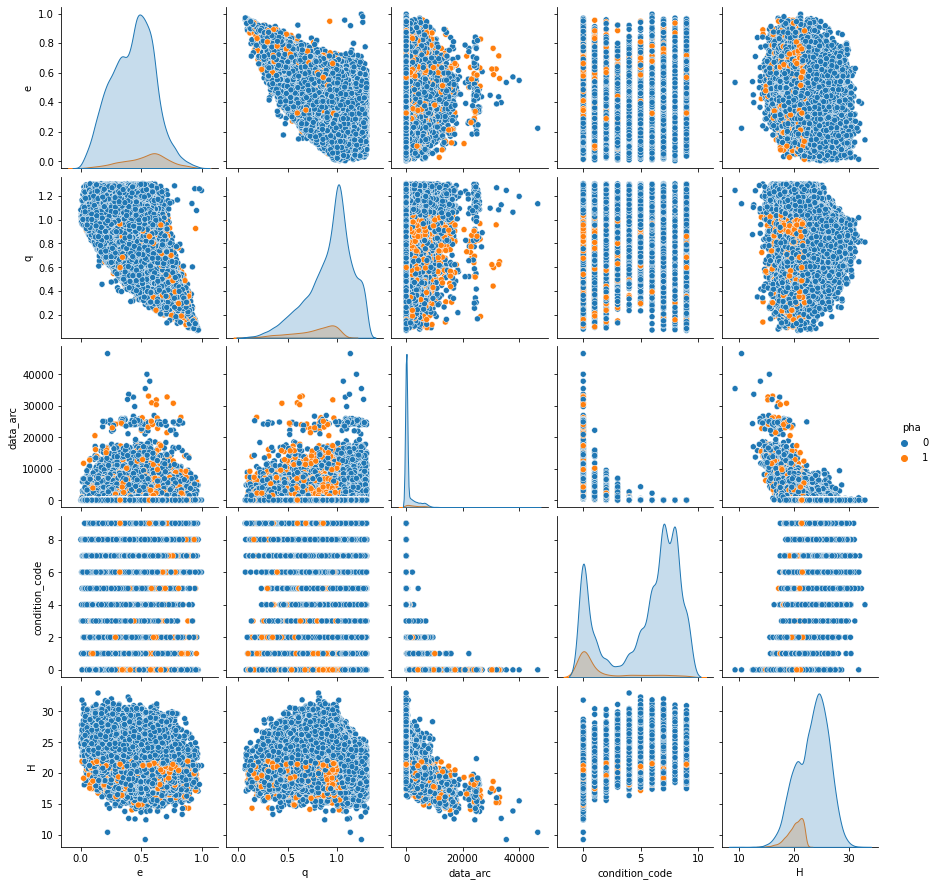

In [11]:
sns.pairplot(data[["e", "q", "data_arc", "condition_code", "H", "pha"]], hue="pha");

# Data Preparation and Functions

In [12]:
# split into training, validation, and test datasets
x, x_test, y, y_test = train_test_split(data.drop(columns=["full_name", "pha", "year"]), data["pha"],
                                        test_size=0.2, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=3)

# scale the x_train, x_val, and x_test datasets
std = StandardScaler()
std.fit(x_train.values)
scaled_x = std.transform(x.values)
scaled_x_train = std.transform(x_train.values)
scaled_x_val = std.transform(x_val.values)
scaled_x_test = std.transform(x_test.values)

In [13]:
def model_check(model, x_train, y_train, x_val, y_val):
    # print out all the metrics
    fit = model.fit(x_train, y_train)
    print("Training Scores")
    print("Accuracy :", accuracy_score(y_train, fit.predict(x_train)))
    print("Precision :", precision_score(y_train, fit.predict(x_train)))
    print("Recall :", recall_score(y_train, fit.predict(x_train)))
    print("F1 :", f1_score(y_train, fit.predict(x_train)))
    print("ROC AUC :", roc_auc_score(y_train, fit.predict_proba(x_train)[:,1]))
    print("")
    print("Validation Scores")
    print("Accuracy :", accuracy_score(y_val, fit.predict(x_val)))
    print("Precision :", precision_score(y_val, fit.predict(x_val)))
    print("Recall :", recall_score(y_val, fit.predict(x_val)))
    print("F1 :", f1_score(y_val, fit.predict(x_val)))
    print("ROC AUC :", roc_auc_score(y_val, fit.predict_proba(x_val)[:,1]))
    
    # create a confusion matrix
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    confusion = confusion_matrix(y_val, fit.predict(x_val))
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True)
    plt.xlabel("Predicted PHA")
    plt.ylabel("Actual PHA")
    
    # create an ROC curve
    plt.subplot(1,2,2)
    fpr, tpr, thresholds = roc_curve(y_val, fit.predict_proba(x_val)[:,1])
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c="gray",ls="--")
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve")

In [14]:
def over_sample(model, scaled_x_train, y_train, scaled_x_val, y_val):
    accuracy, precision, recall, f1 = [], [], [], []
    for i in range(1,12):
        # over sample the positive class
        smt = RandomOverSampler(sampling_strategy={1:np.sum(y_train == 1)*i, 0:np.sum(y_train == 0)}, random_state=42)
        x_tr_rs, y_tr_rs = smt.fit_resample(scaled_x_train, y_train)

        # save all the metrics
        fit = model.fit(x_tr_rs, y_tr_rs)
        accuracy.append(accuracy_score(y_val, fit.predict(scaled_x_val)))
        precision.append(precision_score(y_val, fit.predict(scaled_x_val)))
        recall.append(recall_score(y_val, fit.predict(scaled_x_val)))
        f1.append(f1_score(y_val, fit.predict(scaled_x_val)))

    # plot
    plt.plot(range(1,12), accuracy, label="Accuracy")
    plt.plot(range(1,12), precision, label="Precision")
    plt.plot(range(1,12), recall, label="Recall")
    plt.plot(range(1,12), f1, label="F1")
    plt.xlabel("Multiplier")
    plt.ylabel("Score")
    plt.legend();

    # find the multiplier that maximizes F1 score
    best = range(1,12)[np.where(f1 == max(f1))[0][0]]
    print("Max F1 :", max(f1), "at Multiplier", best)
    
    # over sample the positive class with that new multiplier
    smt = RandomOverSampler(sampling_strategy={1:np.sum(y_train == 1)*best, 0:np.sum(y_train == 0)}, random_state=42)
    x_tr_rs, y_tr_rs = smt.fit_resample(scaled_x_train, y_train)
    return x_tr_rs, y_tr_rs

In [15]:
def over_sample_smote(model, scaled_x_train, y_train, scaled_x_val, y_val):
    accuracy, precision, recall, f1 = [], [], [], []
    for i in range(1,12):
        # over sample the positive class
        smt = SMOTE(sampling_strategy={1:np.sum(y_train == 1)*i, 0:np.sum(y_train == 0)}, random_state=42)
        x_tr_rs, y_tr_rs = smt.fit_resample(scaled_x_train, y_train)

        # save all the metrics
        fit = model.fit(x_tr_rs, y_tr_rs)
        accuracy.append(accuracy_score(y_val, fit.predict(scaled_x_val)))
        precision.append(precision_score(y_val, fit.predict(scaled_x_val)))
        recall.append(recall_score(y_val, fit.predict(scaled_x_val)))
        f1.append(f1_score(y_val, fit.predict(scaled_x_val)))

    # plot
    plt.plot(range(1,12), accuracy, label="Accuracy")
    plt.plot(range(1,12), precision, label="Precision")
    plt.plot(range(1,12), recall, label="Recall")
    plt.plot(range(1,12), f1, label="F1")
    plt.xlabel("Multiplier")
    plt.ylabel("Score")
    plt.legend();

    # find the multiplier that maximizes F1 score
    best = range(1,12)[np.where(f1 == max(f1))[0][0]]
    print("Max F1 :", max(f1), "at Multiplier", best)
    
    # over sample the positive class with that new multiplier
    smt = SMOTE(sampling_strategy={1:np.sum(y_train == 1)*best, 0:np.sum(y_train == 0)}, random_state=42)
    x_tr_rs, y_tr_rs = smt.fit_resample(scaled_x_train, y_train)
    return x_tr_rs, y_tr_rs

# K-Nearest Neighbors

Max F1 : 0.47957371225577267 at Multiplier 3


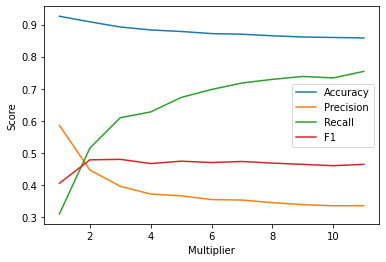

In [16]:
x_tr_rs, y_tr_rs = over_sample_smote(KNeighborsClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 0.9030983243755928
Precision : 0.7349799732977303
Recall : 0.835990888382688
F1 : 0.7822380106571937
ROC AUC : 0.9643418359228761

Validation Scores
Accuracy : 0.8951908957415565
Precision : 0.4098591549295775
Recall : 0.6568848758465011
F1 : 0.5047701647875108
ROC AUC : 0.9176944951211318


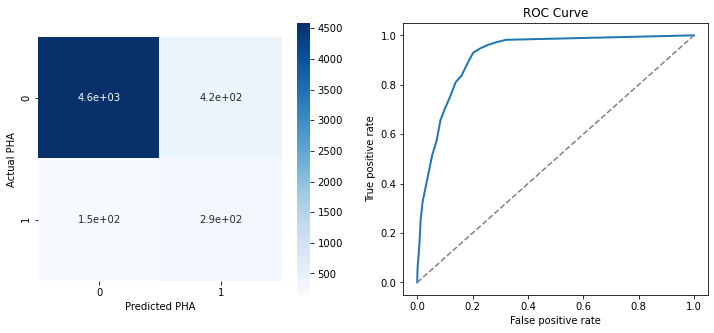

In [17]:
model_check(KNeighborsClassifier(n_neighbors=21), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Logistic Regression
may not be a good model because of the nonlinearity of the data

Max F1 : 0.4351407000686342 at Multiplier 6


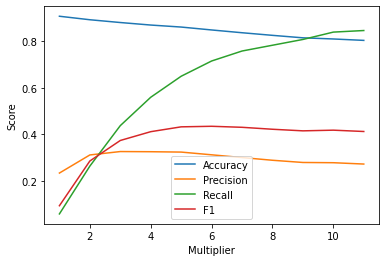

In [18]:
x_tr_rs, y_tr_rs = over_sample_smote(LogisticRegression(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 0.8204893366479131
Precision : 0.73889449772842
Recall : 0.7409516578081499
F1 : 0.7399216479211425
ROC AUC : 0.8941621524350742

Validation Scores
Accuracy : 0.848935389133627
Precision : 0.3126232741617357
Recall : 0.7155756207674944
F1 : 0.4351407000686342
ROC AUC : 0.8853525706798845


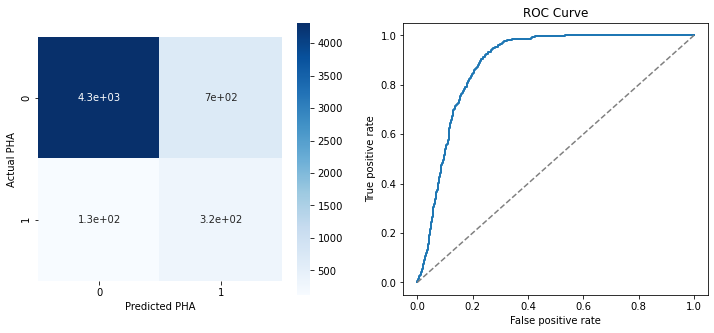

In [19]:
model_check(LogisticRegression(C=0.6), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Decision Tree

Max F1 : 0.6666666666666666 at Multiplier 2


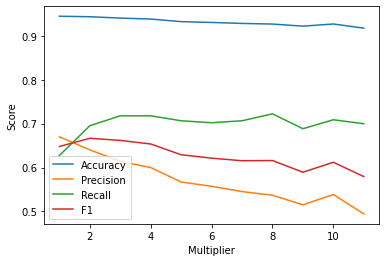

In [20]:
x_tr_rs, y_tr_rs = over_sample_smote(DecisionTreeClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 0.9796727252137478
Precision : 0.9026548672566371
Recall : 0.9681093394077449
F1 : 0.9342370397508701
ROC AUC : 0.9965189462308771

Validation Scores
Accuracy : 0.9456681350954479
Precision : 0.634862385321101
Recall : 0.781038374717833
F1 : 0.7004048582995952
ROC AUC : 0.9015792334076759


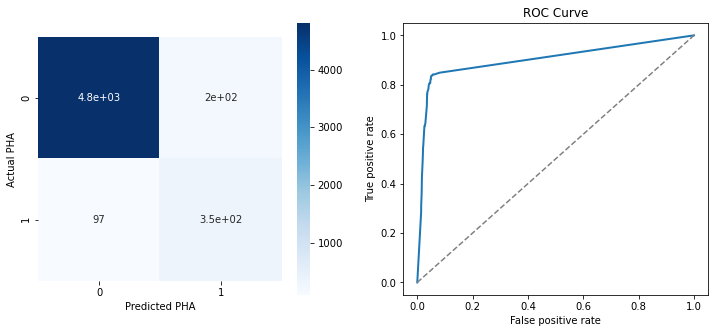

In [21]:
model_check(DecisionTreeClassifier(max_depth=13), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Bagging Classifier

Max F1 : 0.6995708154506438 at Multiplier 3


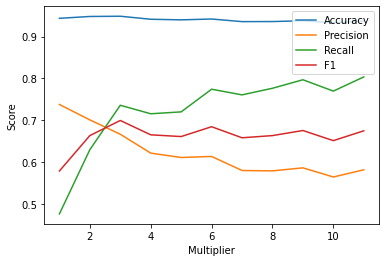

In [22]:
x_tr_rs, y_tr_rs = over_sample_smote(BaggingClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 0.9996311518600485
Precision : 0.9989878542510121
Recall : 0.9992406985573272
F1 : 0.9991142604074402
ROC AUC : 0.999999107318461

Validation Scores
Accuracy : 0.9509911894273128
Precision : 0.662962962962963
Recall : 0.8081264108352144
F1 : 0.728382502543235
ROC AUC : 0.9768881231635181


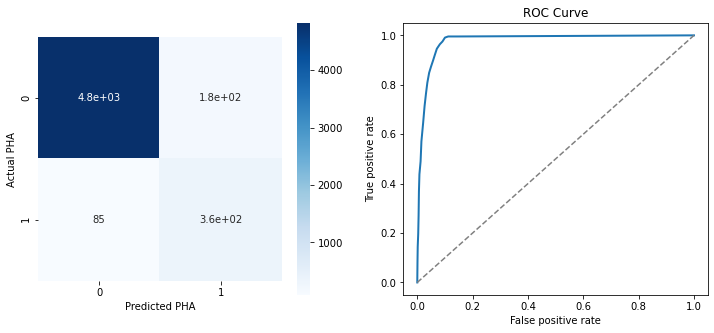

In [23]:
model_check(BaggingClassifier(n_estimators=23), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Random Forest

Max F1 : 0.6289180990899899 at Multiplier 4


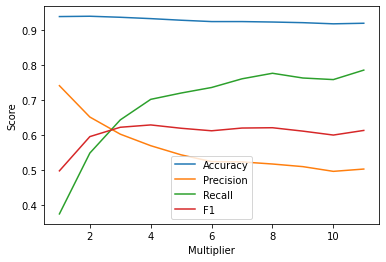

In [24]:
x_tr_rs, y_tr_rs = over_sample_smote(RandomForestClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 0.9989652623798966
Precision : 0.9960294951786727
Recall : 1.0
F1 : 0.9980107985223075
ROC AUC : 0.9999999494708562

Validation Scores
Accuracy : 0.9313509544787077
Precision : 0.5591766723842195
Recall : 0.7358916478555305
F1 : 0.635477582846004
ROC AUC : 0.9644071504116651


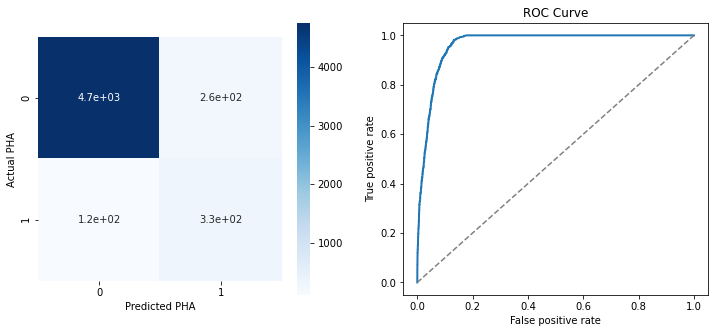

In [25]:
model_check(RandomForestClassifier(max_depth=20), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Extra Trees

Max F1 : 0.6172607879924953 at Multiplier 11


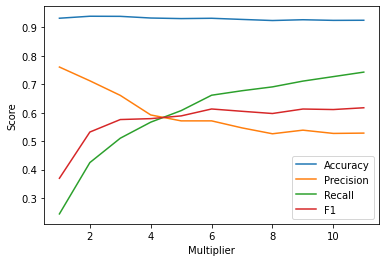

In [26]:
x_tr_rs, y_tr_rs = over_sample_smote(ExtraTreesClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 : 1.0
ROC AUC : 1.0

Validation Scores
Accuracy : 0.9203377386196769
Precision : 0.5072
Recall : 0.7155756207674944
F1 : 0.5936329588014981
ROC AUC : 0.957693999003254


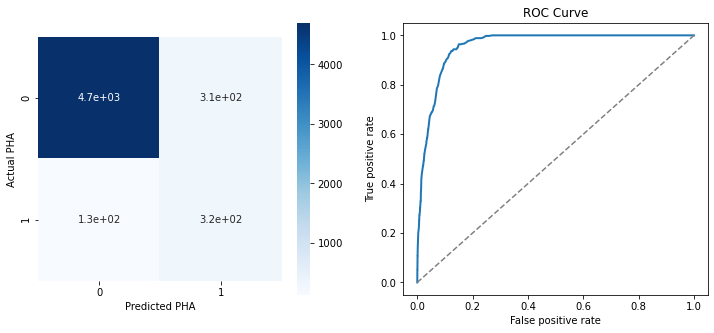

In [27]:
model_check(ExtraTreesClassifier(max_depth=37), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# AdaBoost Classifier

Max F1 : 0.6640701071080818 at Multiplier 11


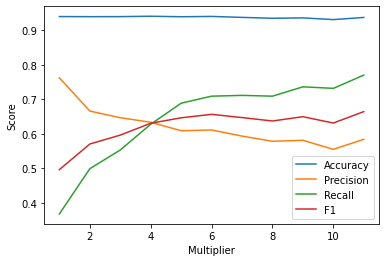

In [28]:
x_tr_rs, y_tr_rs = over_sample_smote(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=13)),
                                     scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 : 1.0
ROC AUC : 1.0

Validation Scores
Accuracy : 0.9330029368575624
Precision : 0.5658783783783784
Recall : 0.7562076749435666
F1 : 0.6473429951690821
ROC AUC : 0.9619888012664537


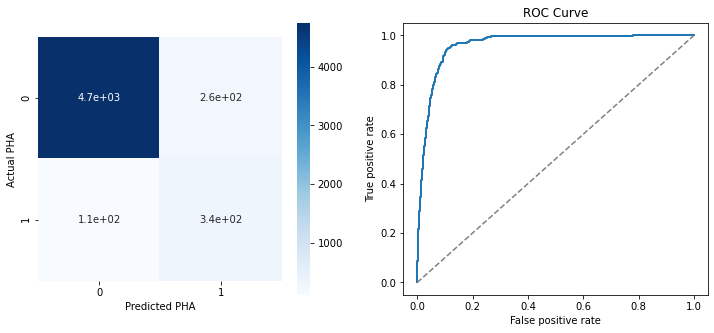

In [29]:
model_check(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=13)),
            x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# Gradient Boosting

Max F1 : 0.6459227467811158 at Multiplier 2


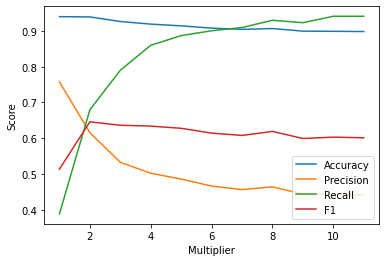

In [30]:
x_tr_rs, y_tr_rs = over_sample_smote(GradientBoostingClassifier(), scaled_x_train, y_train, scaled_x_val, y_val)

Training Scores
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 : 1.0
ROC AUC : 1.0

Validation Scores
Accuracy : 0.9583333333333334
Precision : 0.7477064220183486
Recall : 0.7358916478555305
F1 : 0.7417519908987485
ROC AUC : 0.9812111139424909


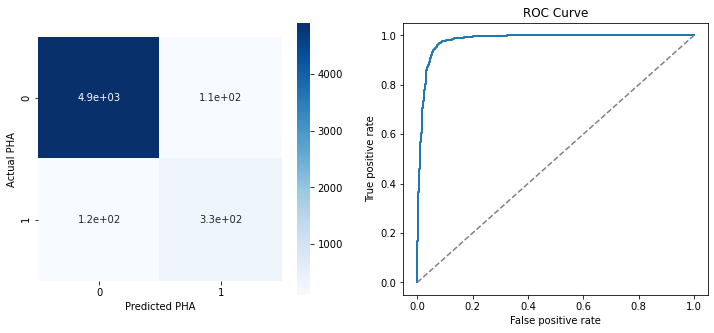

In [31]:
model_check(GradientBoostingClassifier(max_depth=13), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

# XGBoost

Max F1 : 0.768 at Multiplier 5


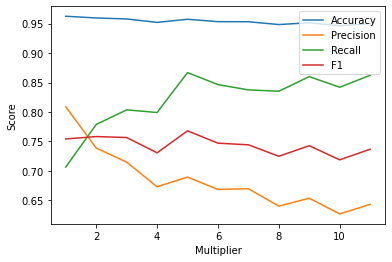

In [32]:
x_tr_rs, y_tr_rs = over_sample_smote(XGBClassifier(use_label_encoder=False, eval_metric="error"),
                                     scaled_x_train, y_train, scaled_x_val, y_val)

Max F1 : 0.768 at Tree Depth 6


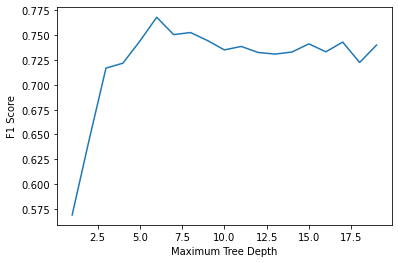

In [33]:
# optimize the maximum depth of the tree
f1 = []
for i in range(1,20):
    model = XGBClassifier(use_label_encoder=False, eval_metric="error", max_depth=i).fit(x_tr_rs, y_tr_rs)
    f1.append(f1_score(y_val, model.predict(scaled_x_val)))

plt.plot(range(1,20), f1)
plt.xlabel("Maximum Tree Depth")
plt.ylabel("F1 Score");

print("Max F1 :", max(f1), "at Tree Depth", range(1,20)[np.where(f1 == max(f1))[0][0]])

Max F1 : 0.773797338792221 at Threshold 0.5


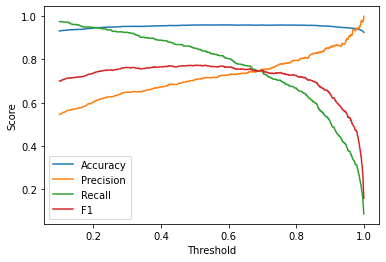

In [34]:
# quickly define and fit the model
model = XGBClassifier(use_label_encoder=False, eval_metric="error", max_depth=6, learning_rate=0.3, n_estimators=155)
model = model.fit(x_tr_rs, y_tr_rs)

accuracy, precision, recall, f1 = [], [], [], []
for i in np.arange(0.1,1,0.001):
    # save all the metrics
    predict = model.predict_proba(scaled_x_val)[:,1] >= i
    accuracy.append(accuracy_score(y_val, predict))
    precision.append(precision_score(y_val, predict))
    recall.append(recall_score(y_val, predict))
    f1.append(f1_score(y_val, predict))

# plot
plt.plot(np.arange(0.1,1,0.001), accuracy, label="Accuracy")
plt.plot(np.arange(0.1,1,0.001), precision, label="Precision")
plt.plot(np.arange(0.1,1,0.001), recall, label="Recall")
plt.plot(np.arange(0.1,1,0.001), f1, label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend();

# find the threshold that maximizes F1 score
best = round(np.arange(0.1,1,0.001)[np.where(f1 == max(f1))[0][0]], 3)
print("Max F1 :", max(f1), "at Threshold", best)

Training Scores
Accuracy : 0.9999074588191745
Precision : 0.9996963716411112
Recall : 1.0
F1 : 0.999848162769511
ROC AUC : 1.0

Validation Scores
Accuracy : 0.9594346549192364
Precision : 0.7078651685393258
Recall : 0.8532731376975169
F1 : 0.773797338792221
ROC AUC : 0.9848517171316268


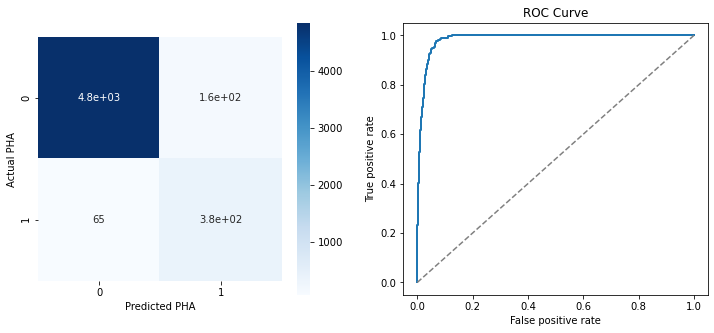

In [35]:
model_check(XGBClassifier(use_label_encoder=False, eval_metric="error", max_depth=6,
                          learning_rate=0.3, n_estimators=155), x_tr_rs, y_tr_rs, scaled_x_val, y_val)

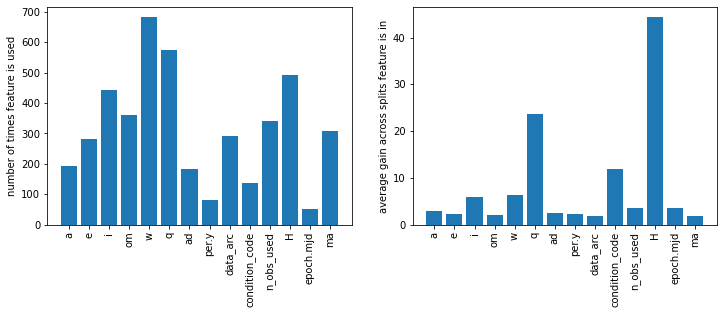

In [36]:
# plot a couple figures of feature importance
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(x_train.columns.to_list(), model.get_booster().get_score().values())
plt.xticks(rotation=90)
plt.ylabel("number of times feature is used")

plt.subplot(1,2,2)
plt.bar(x_train.columns.to_list(), model.get_booster().get_score(importance_type="gain").values())
plt.xticks(rotation=90)
plt.ylabel("average gain across splits feature is in");

In [37]:
# find the test scores
print("Test Scores")
print("Accuracy :", accuracy_score(y_test, model.predict(scaled_x_test)))
print("Precision :", precision_score(y_test, model.predict(scaled_x_test)))
print("Recall :", recall_score(y_test, model.predict(scaled_x_test)))
print("F1 :", f1_score(y_test, model.predict(scaled_x_test)))
print("ROC AUC :", roc_auc_score(y_test, model.predict_proba(scaled_x_test)[:,1]))

Test Scores
Accuracy : 0.9625550660792952
Precision : 0.7361111111111112
Recall : 0.8393665158371041
F1 : 0.7843551797040168
ROC AUC : 0.9838750061012758


# Voting Classifier

In [38]:
smt = SMOTE(sampling_strategy={1:np.sum(y_train == 1)*3, 0:np.sum(y_train == 0)}, random_state=42)
x_tr_rs, y_tr_rs = smt.fit_resample(scaled_x_train, y_train)

In [39]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=13)
bc = BaggingClassifier(n_estimators=23)
rf = RandomForestClassifier(max_depth=20)
et = ExtraTreesClassifier(max_depth=37)
gb = GradientBoostingClassifier(max_depth=13)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error", max_depth=6, learning_rate=0.3, n_estimators=155)
model_list = [("knn", knn), ("log_reg", lr), ("tree", dt), ("bag", bc), ("forest", rf),
              ("extra", et), ("boost", gb), ("xgb", xgb)]
vc = VotingClassifier(estimators=model_list, voting="soft")
vc.fit(x_tr_rs, y_tr_rs)
f1_score(y_val, vc.predict(scaled_x_val))

0.7227615965480042

# Stacking Classifier

In [40]:
sc = StackingClassifier(estimators=model_list, final_estimator=gb)
sc.fit(x_tr_rs, y_tr_rs)
f1_score(y_val, sc.predict(scaled_x_val))

0.6675461741424803

# Gaussian Naive Bayes

Training Scores
Accuracy : 0.6891825746451297
Precision : 0.19658119658119658
Recall : 0.9255884586180714
F1 : 0.32428837456770415
ROC AUC : 0.8567677648721291

Validation Scores
Accuracy : 0.703928046989721
Precision : 0.2072072072072072
Recall : 0.9345372460496614
F1 : 0.3392052437525604
ROC AUC : 0.8652834749900213


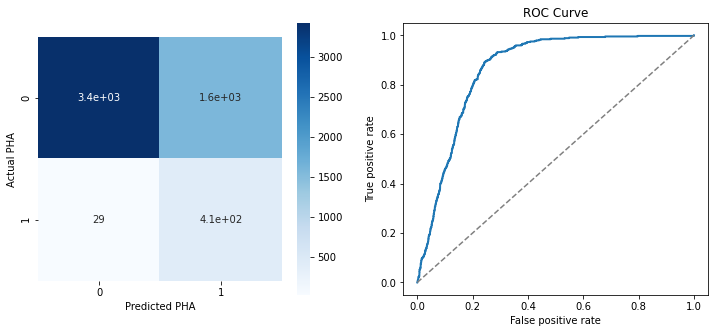

In [41]:
model_check(GaussianNB(), scaled_x_train, y_train, scaled_x_val, y_val)